In [34]:
import pandas
import matplotlib.pyplot as plt
from collections import defaultdict
from gensim import corpora


from google.colab import drive
drive.mount('/content/drive')

df = pandas.read_csv("/content/drive/My Drive/MSBA 214/final/my_tokens.csv", encoding='utf-8')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unnamed: 0                                             tokens  \
0   negative_objective  pretty little dog people taking lyrics defying...   
1  negative_subjective  mate neil famously led bar thailand experience...   
2   positive_objective  long arduous yellow brick road part many ridic...   
3  positive_subjective  music directed john anticipated adaptation bel...   

                                       Transcription  
0  I'll get you my pretty and your little  dog to...  
1  as my mate Neil once famously said as he  led ...  
2  woo I thought this was never going to  come ou...  
3  [Music]  Wicked is directed by John mchu and i...

In [35]:
documents = []

for index in range(len(df)):
  documents.append(df.iloc[index]['Transcription'])

#len(documents)


In [36]:
no_group = df.iloc[0]['tokens']
ns_group = df.iloc[1]['tokens']
po_group = df.iloc[2]['tokens']
ps_group = df.iloc[3]['tokens']

In [37]:
texts = no_group.split()

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
  frequency[text] += 1

# Remove words that appear only once
texts = [text for text in texts if frequency[text] > 1]


In [46]:
dataset = [d.split() for d in documents]

In [49]:
dictionary = corpora.Dictionary(dataset)
corpus = [dictionary.doc2bow(text) for text in dataset]

In [51]:
from gensim import models
lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=2)
corpus_lda = lda_model[corpus]

In [52]:
for doc, as_text in zip(corpus_lda, documents):
    print(doc, as_text)

[(1, 0.9994977)] I'll get you my pretty and your little  dog too people are taking the lyrics of  Defying Gravity and really holding space  with that uh I didn't know that that was  happening I've seen it yeah that's  really powerful M some people without  brains do an awful lot of talking all  righty folks you've been waiting for it  we're here to review the brand new  blockbuster musical Wicked part one this  video is sponsored by friends at Express  UPN  so I know the question you're asking am  I going to burn Barbies am I going to  set Wicked dolls on fire am I going to  take some sort of bulldozer and run it  directly through a model of ozs who know  actually here's the thing the movie's  good movie is actually quite good so let  me give you the leadup I like the  original musical I have some ideological  problems with the musical that we can  talk about what it stands for what is  the moral that they're attempting to  promulgate here why the very books by  Gregory Maguire are sor

In [53]:
w = lda_model.get_topics()
w

array([[2.9526811e-04, 2.9842334e-04, 1.6311897e-04, ..., 1.3601092e-04,
        1.4842307e-04, 1.3207976e-04],
       [2.0004805e-04, 2.7370555e-04, 9.4881623e-05, ..., 1.0393884e-04,
        9.9790006e-05, 1.0523591e-04]], dtype=float32)

In [57]:
# This part is a debug issue
# https://github.com/piskvorky/gensim/issues/3040
!python my_custom_module.py


import sys
sys.path.append('//content/drive/My Drive/MSBA 214/final/') # Allow access for py code

from gensim.topic_coherence import direct_confirmation_measure
from my_custom_module import custom_log_ratio_measure

direct_confirmation_measure.log_ratio_measure = custom_log_ratio_measure # Patch for coherence issue


python3: can't open file '/content/my_custom_module.py': [Errno 2] No such file or directory


In [58]:
from gensim.models.coherencemodel import CoherenceModel

cm = CoherenceModel(model=lda_model, texts=texts, coherence='c_v')
coherence_score = cm.get_coherence()

coherence_score

0.9905283976730832

In [66]:
results = []

for t in range(2, 10):
    lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=t)
    corpus_lda = lda_model[corpus]

    cm = CoherenceModel(model=lda_model, corpus=corpus_lda, texts = texts,coherence='c_v')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)

results = pandas.DataFrame(results, columns=['topic', 'score'])

In [67]:
results

topic     score
0      2  0.990528
1      3  0.990528
2      4  0.990528
3      5  0.990528
4      6  0.990528
5      7  0.990528
6      8  0.990528
7      9  0.990528

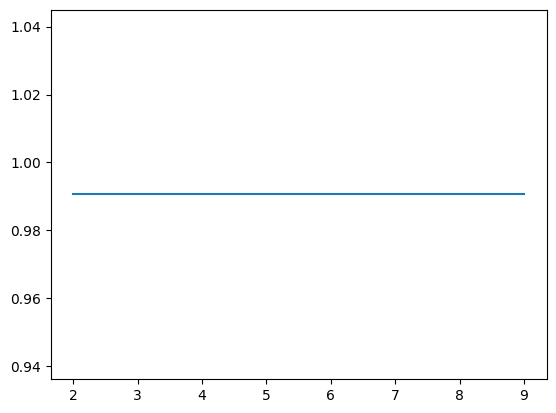

In [68]:
s = pandas.Series(results.score.values, index=results.topic.values)
_ = s.plot()

In [69]:
w = lda_model.get_topics()
w

array([[1.9085615e-04, 2.2969638e-04, 9.1993439e-05, ..., 9.1679329e-05,
        8.7009888e-05, 8.4350766e-05],
       [2.9948007e-04, 3.4112553e-04, 1.6497132e-04, ..., 1.2881080e-04,
        1.3677237e-04, 1.3631971e-04],
       [2.2981511e-04, 2.8630326e-04, 1.0731775e-04, ..., 9.9713747e-05,
        8.9451634e-05, 9.8473116e-05],
       ...,
       [2.1025234e-04, 3.0951289e-04, 7.8696052e-05, ..., 9.5755815e-05,
        1.0170920e-04, 9.8639772e-05],
       [1.8206694e-04, 2.5275149e-04, 1.0489275e-04, ..., 1.3313675e-04,
        1.2452343e-04, 1.2074427e-04],
       [2.4764851e-04, 2.9791801e-04, 1.6446636e-04, ..., 1.6636854e-04,
        1.6871562e-04, 1.7006409e-04]], dtype=float32)

In [71]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.1 MB/s eta 0:00:00


NameError: name 'id2word' is not defined